# Fractional Brownian Motion Parameter Estimation Using Variance Aggregation

Consider a time series of $n$, identically distributed samples,</br>

$
\begin{align}
X_1, X_2,X_3,\ldots,X_n
\end{align}
$

Divide the series into $d$ smaller series of length $m$ where $md=n$.\ and let,</br>
$k = 0,1,2,3,\ldots,d-1$ and define the aggregated sum by,

$
\begin{align}
X_k^m &= \frac{1}{m}\left( X_{km+1} + X_{km+2} + \cdots + X_{km+m-1} + X_{km+m} \right) \\
&= \frac{1}{m} \left( X_{km+1} + \cdots + X_{(k+1)m} \right) \\
&= \frac{1}{m} \sum_{i=km+1}^{(k+1)m} X_i
\end{align}
$

The aggregated mean is given by,

$
\begin{align}
\text{E}[X^m] &= \frac{1}{d}\sum_{i=1}^d X_i^m \\
&= \frac{1}{dm} \sum_{i=1}^d \sum_{j=im+1}^{(k+1)i} X_j \\
&= \frac{1}{n} \sum_{i=1}^n X_i
\end{align}
$

and the aggregated variance by,

$
\begin{align}
\text{Var}[X^m] = \frac{1}{d} \sum_{i=1}^d\left( X^m_i - \text{E}[X^m] \right)^2
\end{align}
$

This method makes use of the self similarity of fractional brownian motion. Consider the aggregated process,

$
\begin{align}
X_0^m = \frac{1}{m} \sum_{i=1}^m X_i
\end{align}
$

From self similarity of fractional brownian motion,

$
\begin{align}
X_{ai} \sim a^H X_i
\end{align}
$

Since the distribution of the sum of Gaussian random variables is the distribution of the last it follows that,</br> 

$
\begin{align}
X_0^m \sim \frac{1}{m} X_m \sim \frac{m^H}{m} X_1 = m^{H-1} X_1
\end{align}
$

For fractional brownian noise,

$
\begin{align}
&\text{E}[\Delta Z^H_t] = 0 \\
&\text{Var}[\Delta Z^H_t] = \Delta t^{2H}
\end{align}
$

$X_1$ is a single increment of brownian motion it follows that,

$
\begin{align}
\text{Var}[X_1] = \Delta t^{2H} = \sigma^2
\end{align}
$

so,

$
\begin{align}
\text{Var}[X_0^m] = \text{Var}[m^{H-1} X_1] = m^{2(H-1)}\text{Var}[X_1] = \sigma^2 m^{2(H-1)}
\end{align}
$

From stationarity of it follows that,

$
\begin{align}
\text{Var}[X_k^m] = \sigma^2 m^{2(H-1)}
\end{align}
$

It follows that $H$ can be determined by using OLS on $\text{Var}[X_k^m]$ as a function of $m$.

## Imports

In [183]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import bm
from lib import plots
from lib import config
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [184]:
Δt = 1.0
npts = 2**10
nagg = 100
m = [1, 10, 50]

## Simulation $H=0.8$

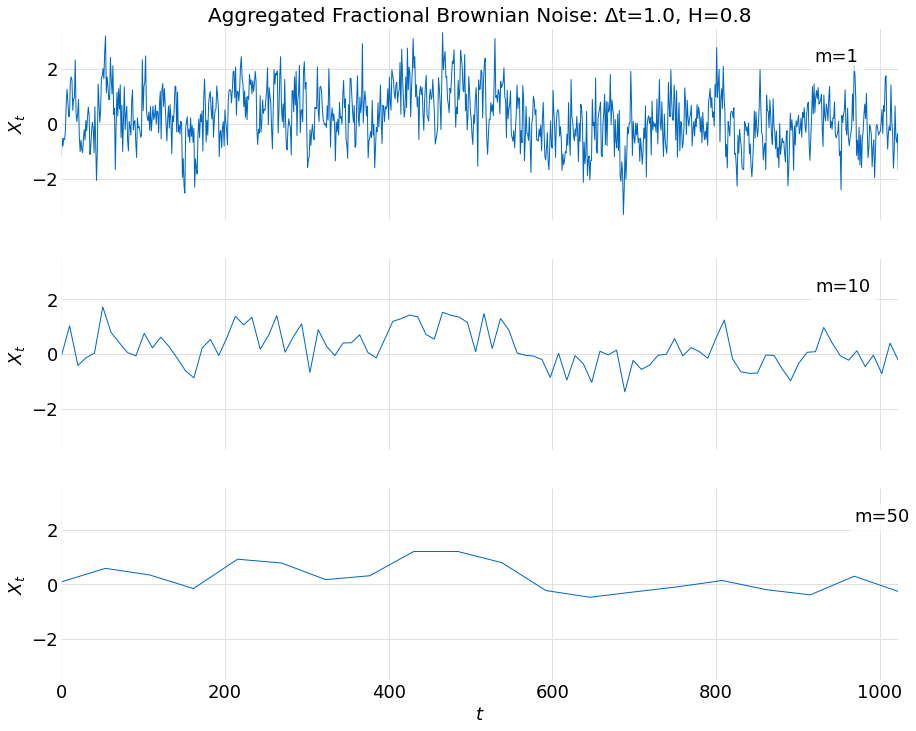

In [185]:
H = 0.8

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.time_series_stack(series, [-3.5, 3.5], labels, title, time)

In [186]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, stats.RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1511.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           2.30e-61
Time:                        04:45:25   Log-Likelihood:                 218.76
No. Observations:                 100   AIC:                            -433.5
Df Residuals:                      98   BIC:                            -428.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0075      0.014      0.524      0.602      -0.021       0.036
x1            -0.3619      0.009    -38.877      0.000      -0.380      -0.343
==============================================================================
Omnibus:                        4.485   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                3.884
Skew:                           0.376   Prob(JB):                        0.143
Kurtosis:                       3.605   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

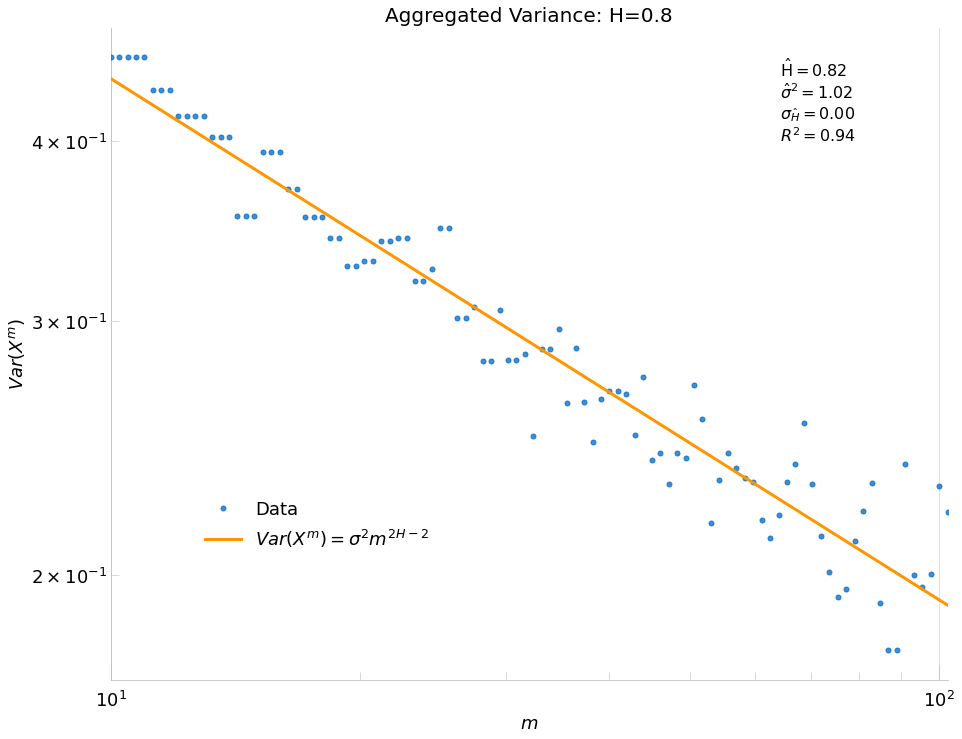

In [187]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, plots.RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.6$

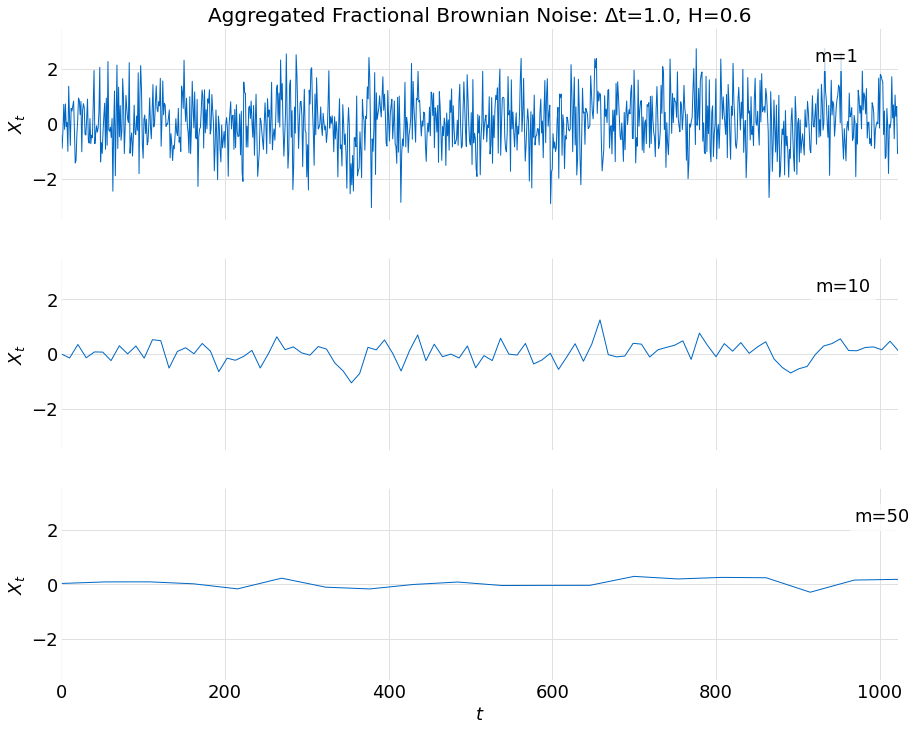

In [188]:
H = 0.6

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.time_series_stack(series, [-3.5, 3.5], labels, title, time)

In [189]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, stats.RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1066.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           1.81e-54
Time:                        04:45:26   Log-Likelihood:                 110.07
No. Observations:                 100   AIC:                            -216.1
Df Residuals:                      98   BIC:                            -210.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1065      0.042      2.515      0.014       0.022       0.190
x1            -0.9013      0.028    -32.653      0.000      -0.956      -0.846
==============================================================================
Omnibus:                        9.928   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.508
Skew:                          -0.557   Prob(JB):                      0.00317
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

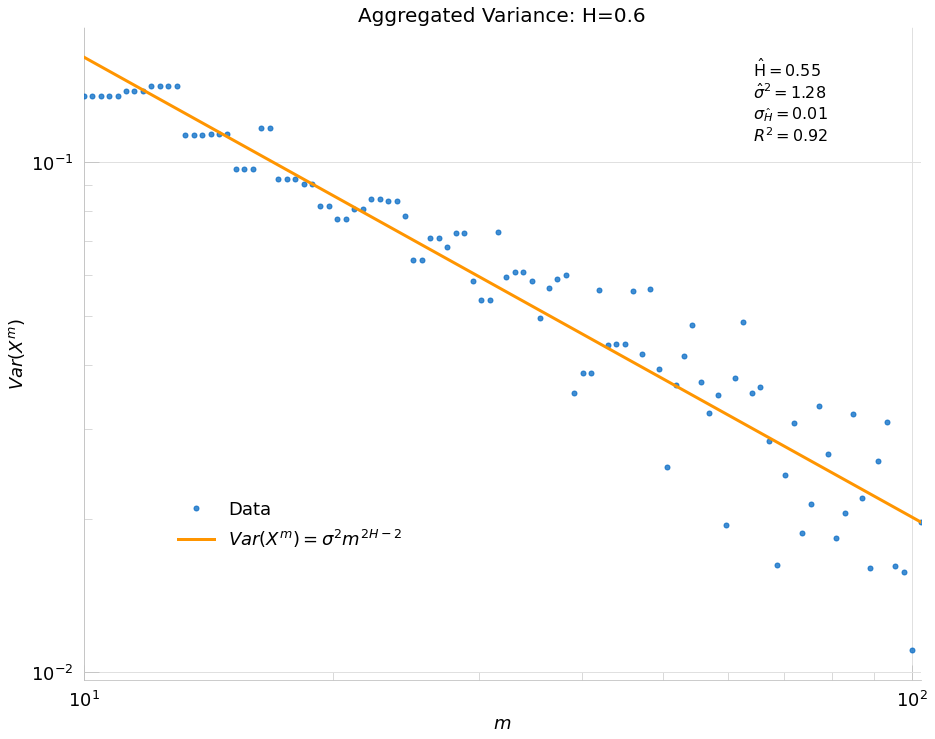

In [190]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, plots.RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.4$

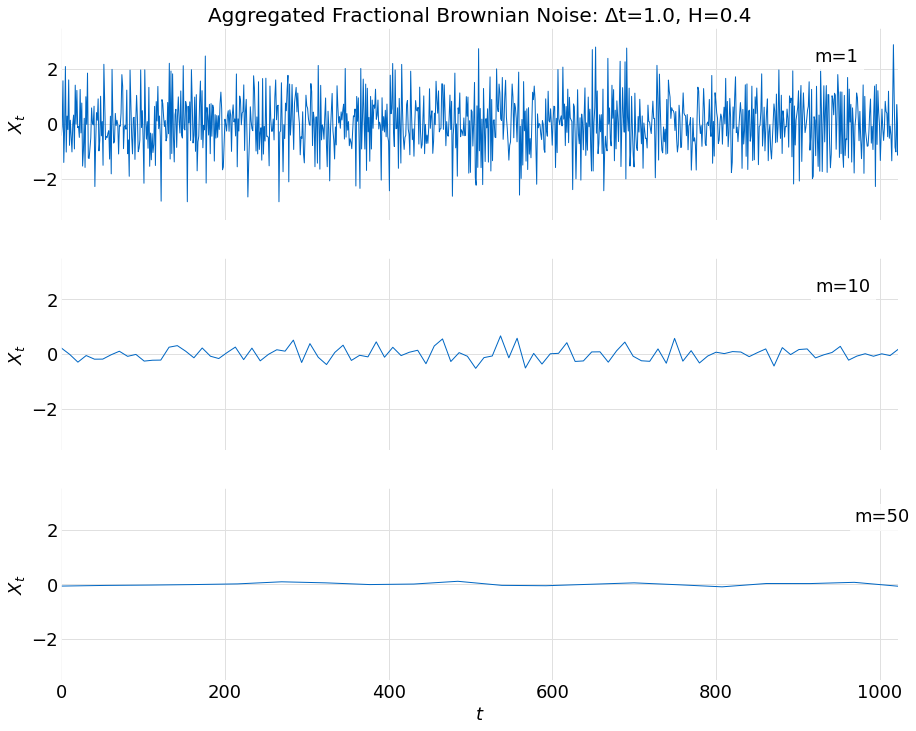

In [191]:
H = 0.4

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.time_series_stack(series, [-3.5, 3.5], labels, title, time)

In [192]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, stats.RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           5.87e-65
Time:                        04:45:26   Log-Likelihood:                 80.181
No. Observations:                 100   AIC:                            -156.4
Df Residuals:                      98   BIC:                            -151.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4246      0.057      7.438      0.000       0.311       0.538
x1            -1.5821      0.037    -42.512      0.000      -1.656      -1.508
==============================================================================
Omnibus:                       18.150   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.733
Skew:                          -0.793   Prob(JB):                     5.76e-07
Kurtosis:                       5.093   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

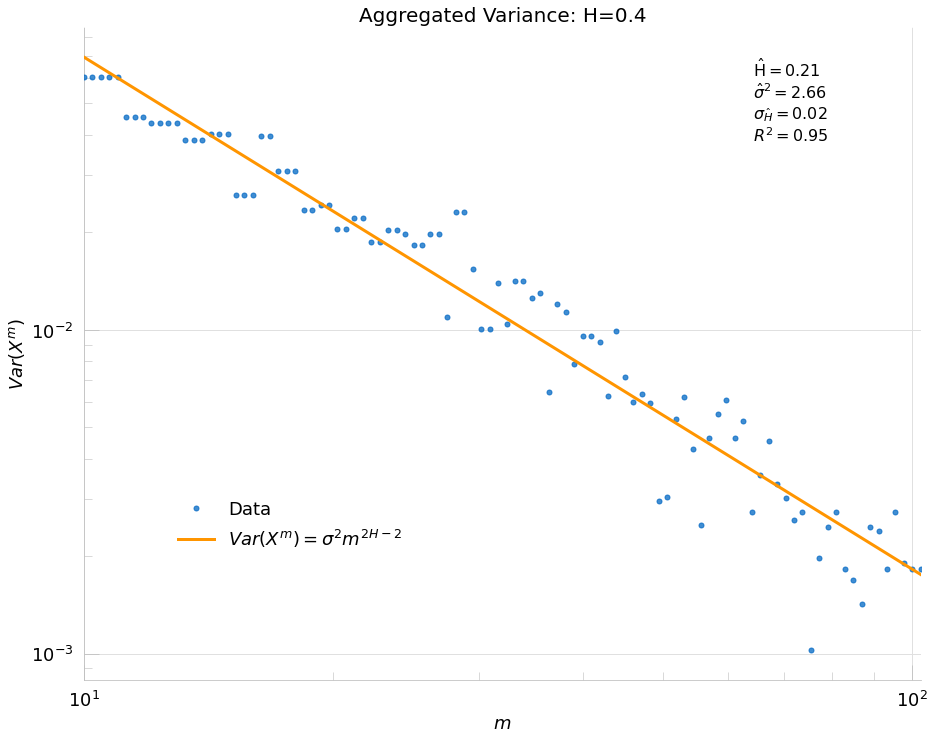

In [193]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, plots.RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.2$

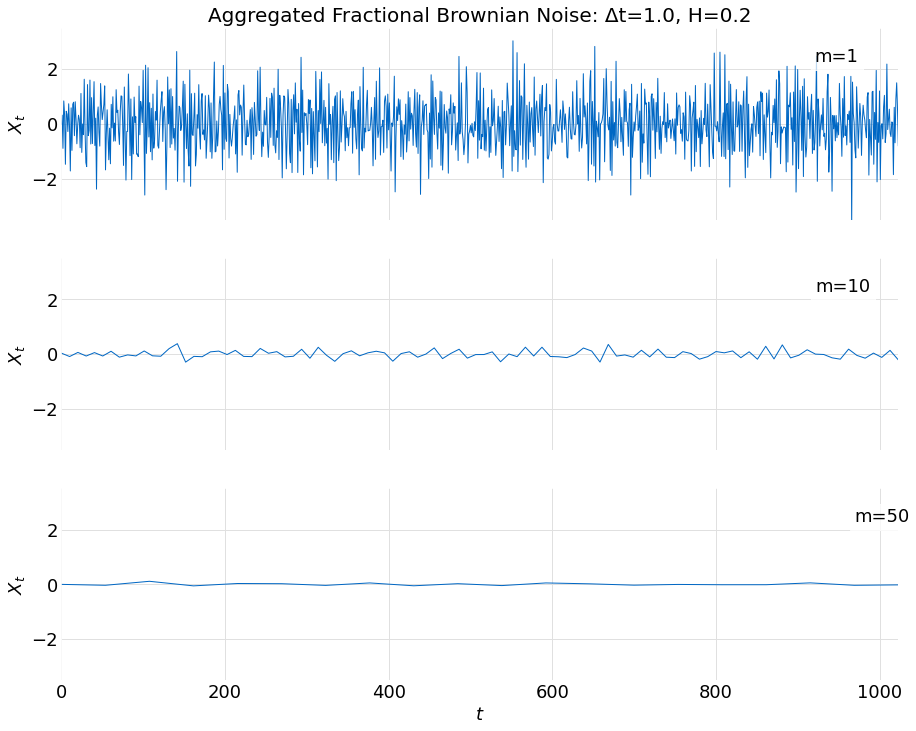

In [194]:
H = 0.2

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.time_series_stack(series, [-3.5, 3.5], labels, title, time)

In [195]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, stats.RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1341.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           5.54e-59
Time:                        04:45:27   Log-Likelihood:                 53.145
No. Observations:                 100   AIC:                            -102.3
Df Residuals:                      98   BIC:                            -97.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2168      0.075      2.898      0.005       0.068       0.365
x1            -1.7860      0.049    -36.621      0.000      -1.883      -1.689
==============================================================================
Omnibus:                       11.363   Durbin-Watson:                   2.395
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               18.613
Skew:                          -0.462   Prob(JB):                     9.08e-05
Kurtosis:                       4.901   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

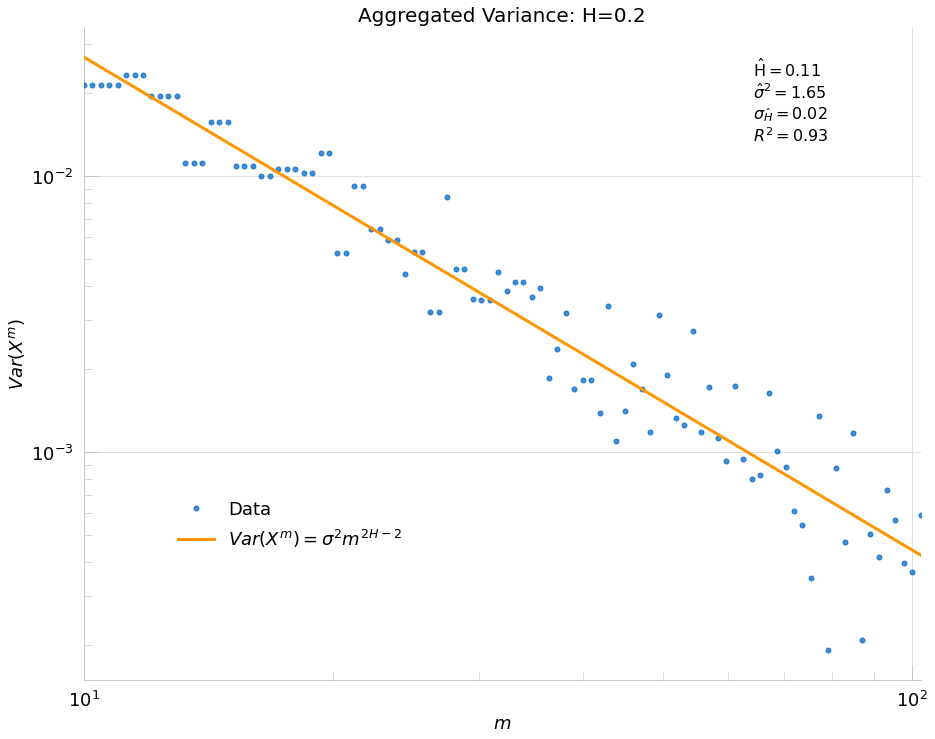

In [196]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title, plots.RegressionPlotType.FBM_AGG_VAR)